# Summary Length

In [1]:
import pandas as pd
import numpy as np
import nltk

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so
import utils

In [2]:
DATA_PATH = './jiraEvolutions/'

LOG = utils.CustomLogger('CustomLogger', log_level='info', display_loglevel=False, display_datetime=False)
PICKLE_LIB = utils.PickleLib(data_path=DATA_PATH, logger=LOG)

In [3]:
evo_df = PICKLE_LIB.pickle_load(f"{DATA_PATH}load_evolution_dataframe(sample_data_n=10000)", 'gzip')

[Start] 🥒 Loading data from Pickle: "./jiraEvolutions/load_evolution_dataframe(sample_data_n=10000).pgzip"


	 Data: 100%|#####################################################| 555M/555M [00:03<00:00, 143MB/s]

[ End ] Duration: 00:00:04.9494


In [4]:
evo_df.head(5)

,jira,issue_id,history_order,field,field_evo_order,field_evo_first,field_evo_last,data_from,data_to,history_author,...,last_creator,last_reporter,last_assignee,last_commenter,last_evolver,prev_creators,prev_reporters,prev_assignees,prev_commenters,prev_evolvers
0,Apache,12851045,0,Summary,0,True,True,None,Replace deprecated boxjavalibv2 with box-java-sdk,Tomas Rohovsky,...,None,None,None,None,None,[],[],[],[],[]
1,Apache,12851045,0,Description,0,True,True,None,camel-box component is based on boxjavalibv2 \...,Tomas Rohovsky,...,None,None,None,None,None,[],[],[],[],[]
2,Apache,12851045,0,VersionsAffected,0,True,True,None,2.15.2,Tomas Rohovsky,...,None,None,None,None,None,[],[],[],[],[]
3,Apache,12851045,0,IssueType,0,True,True,None,Improvement,Tomas Rohovsky,...,None,None,None,None,None,[],[],[],[],[]
4,Apache,12851045,0,Project,0,True,True,None,Camel,Tomas Rohovsky,...,None,None,None,None,None,[],[],[],[],[]


In [5]:
evo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1511000 entries, 0 to 1580889
Data columns (total 32 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   jira                    1511000 non-null  object             
 1   issue_id                1511000 non-null  object             
 2   history_order           1511000 non-null  int64              
 3   field                   1511000 non-null  object             
 4   field_evo_order         1511000 non-null  int64              
 5   field_evo_first         1511000 non-null  bool               
 6   field_evo_last          1511000 non-null  bool               
 7   data_from               303492 non-null   object             
 8   data_to                 1468717 non-null  object             
 9   history_author          1511000 non-null  object             
 10  history_created_date    1511000 non-null  datetime64[ns, UTC]
 11  issue_self      

In [6]:
val = evo_df['history_author'].unique()
val.size

27836

In [7]:
val = evo_df['issue_creator'].unique()
val.size

17476

# Full Dataset

### Preprocessing

In [8]:
df_sum = evo_df[evo_df["field"] == "Summary"]
df_sum_processed = df_sum.filter(['issue_id', 'history_order', 'field_evo_order', 'data_from', 'data_to'], axis=1)
df_sum_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75193 entries, 0 to 1580874
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   issue_id         75193 non-null  object
 1   history_order    75193 non-null  int64 
 2   field_evo_order  75193 non-null  int64 
 3   data_from        10353 non-null  object
 4   data_to          75193 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.4+ MB


In [9]:
df_sum_processed['word_count'] = df_sum_processed['data_to'].str.count(' ') + 1
df_sum_processed.sort_values('issue_id')
df_sum_processed.head(5)

,issue_id,history_order,field_evo_order,data_from,data_to,word_count
0,12851045,0,0,None,Replace deprecated boxjavalibv2 with box-java-sdk,5
22,13004080,0,0,None,LWT contention appears to be under reported,7
46,12456691,0,0,None,BeanValidator throws Exception if external Exp...,9
78,13401522,0,0,None,Upgrade TonY version to 0.4.7,5
97,12695730,0,0,None,Language endpoint with constant cannot load fr...,8


In [13]:
n = len(pd.unique(df_sum_processed['issue_id']))
 
print("No.of.unique ids :", n)

No.of.unique ids : 57115


In [14]:
df_sum_processed.to_csv("data/dataAnalysis/summary_df.csv")

### Visualization

In [16]:
df = pd.read_csv('./data/dataAnalysis/summary_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75193 entries, 0 to 75192
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       75193 non-null  int64 
 1   issue_id         75193 non-null  int64 
 2   history_order    75193 non-null  int64 
 3   field_evo_order  75193 non-null  int64 
 4   data_from        10353 non-null  object
 5   data_to          75193 non-null  object
 6   word_count       75193 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 4.0+ MB


In [17]:
df[df['field_evo_order'] >= 4]

,Unnamed: 0,issue_id,history_order,field_evo_order,data_from,data_to,word_count
843,20130,13190691,12,4,Upgrade Juneau to 7.2.1,Upgrade Juneau to 8.0.0,4
844,20131,13190691,13,5,Upgrade Juneau to 8.0.0,Upgrade Juneau to 7.2.1,4
1880,45839,13235653,70,4,JmsCheckpointMark Avro Serialization issue wit...,JmsCheckpointMark can not be correctly encoded,6
2598,63628,13177210,21,4,create SHA-512 checksum for source-release arc...,create SHA-512 checksum for source-release arc...,10
2708,66391,12755143,4,4,Refactor the OS-dependent Ambari Windows compo...,Refactor the OS-dependent Ambari Server Window...,7
...,...,...,...,...,...,...,...
69264,1466481,77633,9,5,Revise FileSystemUtils towards NIO,Revise FileSystemResource / FileSystemUtils / ...,8
72165,1522501,62172,21,4,AnnotatedElementUtils does not find annotation...,AnnotatedElementUtils fails to find annotation...,7
72166,1522509,62172,28,5,AnnotatedElementUtils fails to find annotation...,AnnotatedElementUtils does not find annotation...,10
74277,1563273,51912,8,4,Create REST API for getting information on all...,Create REST API for getting information on all...,15


In [19]:
df.describe()

,Unnamed: 0,issue_id,history_order,field_evo_order,word_count
count,7.519300e+04,7.519300e+04,75193.000000,75193.000000,75193.000000
mean,7.963745e+05,2.473049e+06,0.703789,0.177290,8.302967
std,4.513650e+05,4.907202e+06,3.139281,0.507885,4.085315
min,0.000000e+00,1.000300e+04,0.000000,0.000000,1.000000
25%,4.103910e+05,2.998100e+04,0.000000,0.000000,5.000000
50%,7.871420e+05,6.555200e+04,0.000000,0.000000,8.000000
75%,1.186401e+06,5.217400e+05,0.000000,0.000000,10.000000
max,1.580874e+06,1.441754e+07,259.000000,9.000000,52.000000


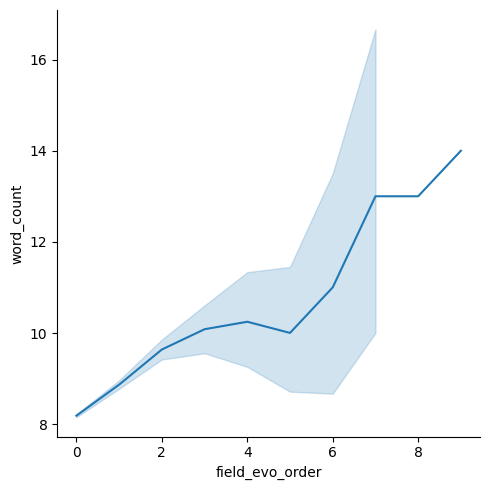

In [20]:

sns.relplot(data=df, kind="line", x="field_evo_order", y="word_count", facet_kws=dict(sharex=False),)

<Axes: xlabel='field_evo_order', ylabel='word_count'>

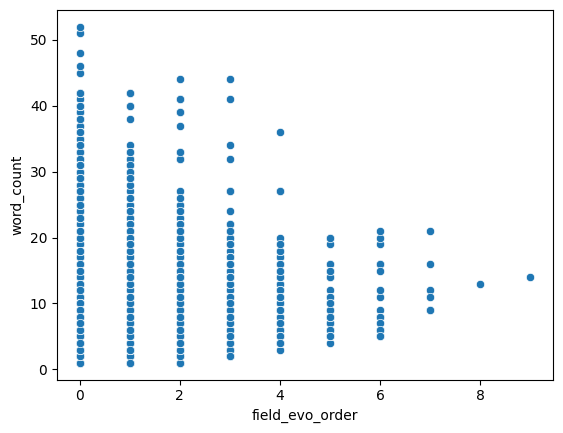

In [21]:
sns.scatterplot(data=df, x="field_evo_order", y="word_count")

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='field_evo_order', ylabel='word_count'>

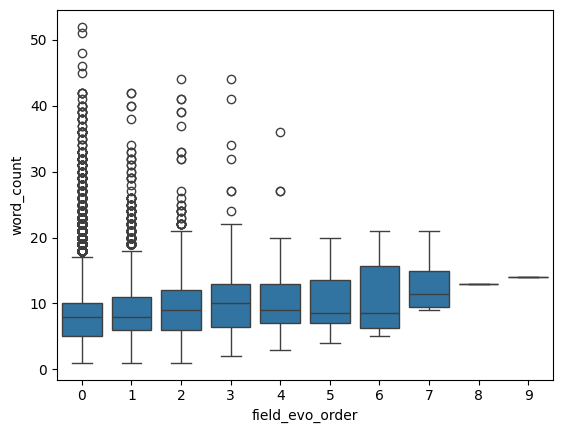

In [22]:
sns.boxplot(data=df, x="field_evo_order", y="word_count")

# By possible Teams

### Preprocessing

In [23]:
max_evo_index = evo_df.groupby(['issue_id'])['history_order'].idxmax()

In [24]:
max_evo_df = evo_df.loc[max_evo_index]
max_evo_df.head(5)

,jira,issue_id,history_order,field,field_evo_order,field_evo_first,field_evo_last,data_from,data_to,history_author,...,last_creator,last_reporter,last_assignee,last_commenter,last_evolver,prev_creators,prev_reporters,prev_assignees,prev_commenters,prev_evolvers
1259954,Sakai,10003,4,Comments,2,False,True,None,I just moved the other ones. No problem. Thank...,Shawn Foster,...,Bonnie Powers,Bonnie Powers,None,Bonnie Powers,Bonnie Powers,[Bonnie Powers],[Bonnie Powers],[],"[Shawn Foster, Bonnie Powers]","[Bonnie Powers, Shawn Foster, Shawn Foster, Bo..."
1393637,Sonatype,10004,10,IssueType,2,False,True,User Story,Improvement,Rich Seddon,...,Deleted User,Deleted User,Dmitry Platonoff,Kristine O'Connor,Kristine O'Connor,[Deleted User],[Deleted User],"[Tamás Cservenák, Dmitry Platonoff]","[Brian Fox, Dmitry Platonoff, Kristine O'Connor]","[Deleted User, Brian Fox, Brian Fox, Dmitry Pl..."
741026,Jira,1000401,23,Comments,2,False,True,None,A fix for this issue (not being able to import...,Harry J.E Day 🔓,...,João Nunes,João Nunes,Harry Day,Harry J.E Day 🔓,Harry J.E Day 🔓,[João Nunes],[João Nunes],[Harry Day],"[Gavad Khan, Harry J.E Day 🔓]","[João Nunes, João Nunes, Kiran, Kiran, Eric S,..."
655617,Jira,1000490,4,Status,2,False,True,Resolved,Closed,Monique Khairuliana,...,Rodrigo B.,Rodrigo B.,None,None,Rodrigo B.,[Rodrigo B.],[Rodrigo B.],[],[],"[Rodrigo B., Rodrigo B., Rodrigo B., Rodrigo B.]"
921654,MongoDB,1001071,29,Comments,22,False,True,None,"Author:{'email': 'kay.kim@10gen.com', 'usernam...",Githook User,...,Mark Callaghan,Mark Callaghan,Kay Kim,Githook User,Kay Kim,[Mark Callaghan],[Mark Callaghan],[Kay Kim],"[Kelsey T Schubert, Githook User, Githook User...","[Mark Callaghan, Kelsey T Schubert, Kelsey T S..."


In [25]:
def combineWorkers(entry):
    print(entry)
    workers = np.concatenate((entry['prev_evolvers'], entry['last_evolver']))
    entry['evolvers'] = np.unique(workers)
    


In [44]:
max_evo_df.apply(combineWorkers, axis=1)



#df_sum_processed['word_count'] = df_sum_processed['data_to'].str.count(' ') + 1
#df_sum_processed['summary_evo'] = df_sum_processed.groupby('issue_id').cumcount() + 1
#df_sum_processed.sort_values('issue_id')
#df_sum_processed.head(5)

jira                                                                  Sakai
issue_id                                                              10003
history_order                                                             4
field                                                              Comments
field_evo_order                                                           2
field_evo_first                                                       False
field_evo_last                                                         True
data_from                                                              None
data_to                   I just moved the other ones. No problem. Thank...
history_author                                                 Shawn Foster
history_created_date                              2020-09-10 15:54:18+00:00
issue_self                https://sakaiproject.atlassian.net/rest/api/2/...
issue_creator                                                 Bonnie Powers
issue_create

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 0 dimension(s)

In [27]:
df_sum = evo_df[evo_df["field"] == "Summary"]
df_sum_processed = df_sum.filter(['issue_id', 'history_order', 'field_evo_order', 'data_from', 'data_to'], axis=1)
df_sum_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75193 entries, 0 to 1580874
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   issue_id         75193 non-null  object
 1   history_order    75193 non-null  int64 
 2   field_evo_order  75193 non-null  int64 
 3   data_from        10353 non-null  object
 4   data_to          75193 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.4+ MB


# Characters by Issue Type

### Preprocessing

In [28]:
evo_df = PICKLE_LIB.pickle_load(f"{DATA_PATH}load_evolution_dataframe(sample_data_n=10000)", 'gzip')

[Start] 🥒 Loading data from Pickle: "./jiraEvolutions/load_evolution_dataframe(sample_data_n=10000).pgzip"


	 Data: 100%|#####################################################| 555M/555M [00:02<00:00, 187MB/s]

[ End ] Duration: 00:00:04.0234


In [29]:
evo_df_reduced = evo_df.filter(['issue_id', 'history_order', 'field', 'field_evo_order', 'data_from', 'data_to'], axis=1)
evo_df_reduced = evo_df_reduced.loc[(evo_df_reduced["field"] == "Summary") | (evo_df_reduced["field"] == "IssueType")]
evo_df_reduced["field"].unique()


# Create a dictionary to store 'IssueType' values for each 'issue_id'
issue_type_dict = {}

In [30]:
# Iterate over each row of the DataFrame
for index, row in evo_df_reduced.iterrows():
    # Check if the value in the 'field' column is 'IssueType'
    if row['field'] == 'IssueType':
        # Store the 'IssueType' value for the corresponding 'issue_id'
        issue_type_dict[row['issue_id']] = row['data_to']

In [31]:
# Fill the 'issueType' column with values from the dictionary
evo_df_reduced['issue_type'] = evo_df_reduced['issue_id'].map(issue_type_dict)

In [32]:
evo_df_reduced.head(20)

,issue_id,history_order,field,field_evo_order,data_from,data_to,issue_type
0,12851045,0,Summary,0,None,Replace deprecated boxjavalibv2 with box-java-sdk,Improvement
3,12851045,0,IssueType,0,None,Improvement,Improvement
22,13004080,0,Summary,0,None,LWT contention appears to be under reported,Bug
25,13004080,0,IssueType,0,None,Bug,Bug
46,12456691,0,Summary,0,None,BeanValidator throws Exception if external Exp...,Bug
49,12456691,0,IssueType,0,None,Bug,Bug
78,13401522,0,Summary,0,None,Upgrade TonY version to 0.4.7,Improvement
80,13401522,0,IssueType,0,None,Improvement,Improvement
97,12695730,0,Summary,0,None,Language endpoint with constant cannot load fr...,Bug
102,12695730,0,IssueType,0,None,Bug,Bug


In [33]:
evo_df_preprocessed = evo_df_reduced[evo_df_reduced["field"] == "Summary"]

In [ ]:
# evo_df_preprocessed['word_count'] = evo_df_preprocessed['data_to'].str.count(' ') + 1
# evo_df_preprocessed.sort_values('issue_id')
# evo_df_preprocessed.head(5)

# evo_df_preprocessed.to_csv("data/csv/summary_by_issuetype_df.csv")

In [34]:
evo_df_preprocessed['character_count'] = evo_df_preprocessed['data_to'].str.len()

/var/folders/5p/613flb0s6c92xjsqzfyxwwk80000gn/T/ipykernel_50350/1903747787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evo_df_preprocessed['character_count'] = evo_df_preprocessed['data_to'].str.len()


In [35]:
evo_df_preprocessed.sort_values('issue_id')
evo_df_preprocessed.head(5)

,issue_id,history_order,field,field_evo_order,data_from,data_to,issue_type,character_count
0,12851045,0,Summary,0,None,Replace deprecated boxjavalibv2 with box-java-sdk,Improvement,49
22,13004080,0,Summary,0,None,LWT contention appears to be under reported,Bug,43
46,12456691,0,Summary,0,None,BeanValidator throws Exception if external Exp...,Bug,82
78,13401522,0,Summary,0,None,Upgrade TonY version to 0.4.7,Improvement,29
97,12695730,0,Summary,0,None,Language endpoint with constant cannot load fr...,Bug,58


In [36]:
evo_df_preprocessed.to_csv("data/dataAnalysis/summary_charCount_by_issuetype_df.csv")

### Visualization

In [45]:
df = pd.read_csv('./data/dataAnalysis/summary_charCount_by_issuetype_df.csv')

In [46]:
df['issue_type'].unique()

array(['Improvement', 'Bug', 'Task', 'Sub-task', 'Documentation', 'Test',
       'New Feature', 'Wish', 'Story', 'Dependency upgrade',
       'Technical task', 'Planned Work', 'Technical Debt', 'Umbrella',
       'QE Task', 'Feature Request', 'Epic', 'Sub-Task', 'Request',
       'Component Upgrade', 'Brainstorming',
       '(Deprecated) Contributed Patch', 'Test Task', 'Refactoring',
       'Suggestion', 'Backport', 'Change Request', 'Defect',
       'Performance', 'Public Security Vulnerability', 'DAC Feedback',
       'Story Defect', 'Development Task', 'Build Failure',
       'Investigation', 'Backport Sub-Task', 'Release', 'Typo',
       'Incident', 'User Story', 'Enhancement', 'Quality Risk', 'Patch',
       'Component  Upgrade', 'Feature', 'Library Upgrade', 'Dev Task',
       'Tracker', 'Requirement', 'Component Upgrade Subtask',
       'Dev Sub-task', 'Thirdparty Change', 'Support Patch',
       'Roadmap item', 'Pruning'], dtype=object)

In [47]:
df.describe()

,Unnamed: 0,issue_id,history_order,field_evo_order,character_count
count,7.519300e+04,7.519300e+04,75193.000000,75193.000000,75193.000000
mean,7.963745e+05,2.473049e+06,0.703789,0.177290,56.914886
std,4.513650e+05,4.907202e+06,3.139281,0.507885,25.771301
min,0.000000e+00,1.000300e+04,0.000000,0.000000,1.000000
25%,4.103910e+05,2.998100e+04,0.000000,0.000000,39.000000
50%,7.871420e+05,6.555200e+04,0.000000,0.000000,53.000000
75%,1.186401e+06,5.217400e+05,0.000000,0.000000,70.000000
max,1.580874e+06,1.441754e+07,259.000000,9.000000,255.000000


#### All Evolutions are takin into account

<Axes: xlabel='issue_type', ylabel='character_count'>

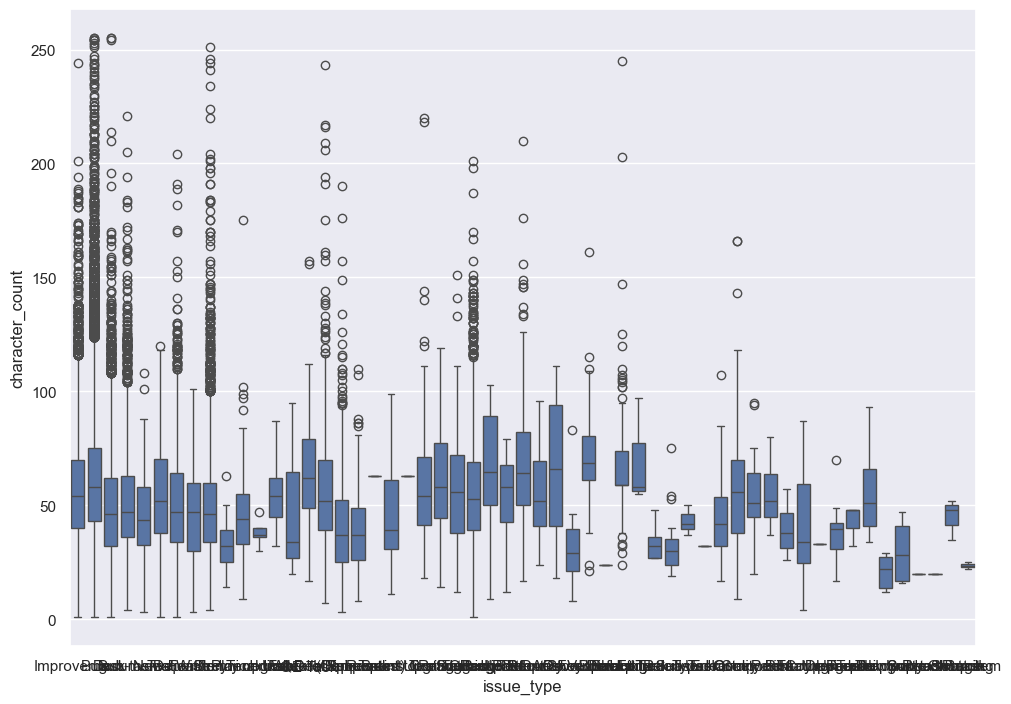

In [48]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=df, x="issue_type", y="character_count")

<Axes: xlabel='field_evo_order', ylabel='character_count'>

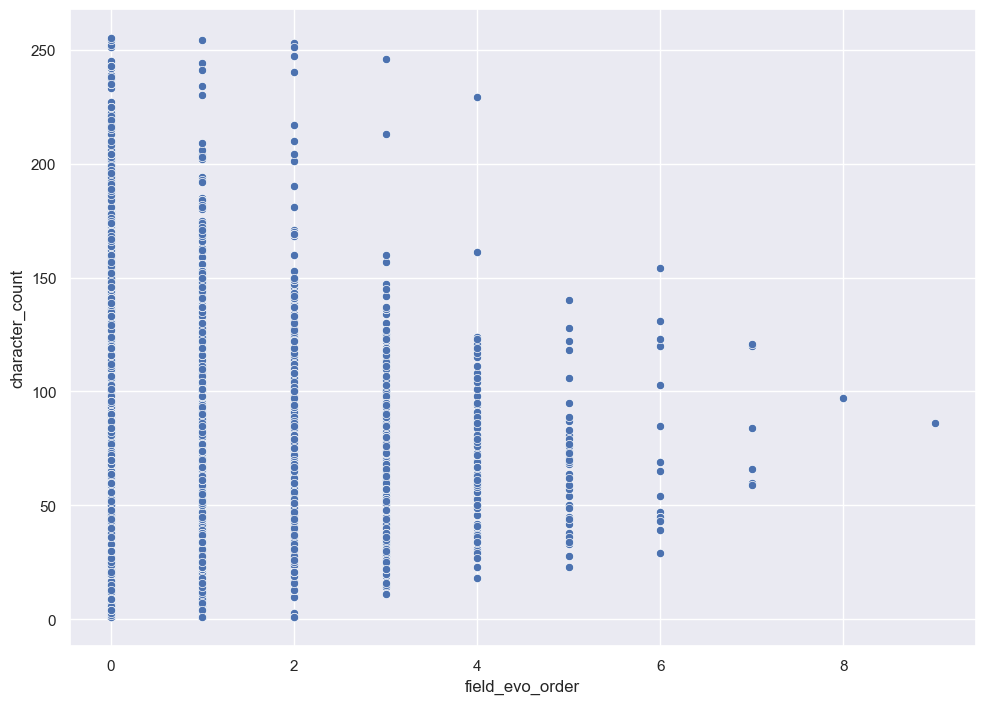

In [49]:
sns.scatterplot(data=df, x="field_evo_order", y="character_count")

#### Set ratio of evolution 0 = first, 1 = last

1. Group Dateframe by ID
2. get max evolution order for each ID
3. Add new column, where the value is the evo ID divided through the max EvoId

In [50]:
df.head(5)

,Unnamed: 0,issue_id,history_order,field,field_evo_order,data_from,data_to,issue_type,character_count
0,0,12851045,0,Summary,0,NaN,Replace deprecated boxjavalibv2 with box-java-sdk,Improvement,49
1,22,13004080,0,Summary,0,NaN,LWT contention appears to be under reported,Bug,43
2,46,12456691,0,Summary,0,NaN,BeanValidator throws Exception if external Exp...,Bug,82
3,78,13401522,0,Summary,0,NaN,Upgrade TonY version to 0.4.7,Improvement,29
4,97,12695730,0,Summary,0,NaN,Language endpoint with constant cannot load fr...,Bug,58


In [51]:
max_evolution = df.groupby('issue_id')['field_evo_order'].max()

In [52]:
df['ratio'] = df.apply(lambda row: 1 if max_evolution[row['issue_id']] == 0 else row['field_evo_order'] / max_evolution[row['issue_id']], axis=1)

df

,Unnamed: 0,issue_id,history_order,field,field_evo_order,data_from,data_to,issue_type,character_count,ratio
0,0,12851045,0,Summary,0,NaN,Replace deprecated boxjavalibv2 with box-java-sdk,Improvement,49,1.0
1,22,13004080,0,Summary,0,NaN,LWT contention appears to be under reported,Bug,43,1.0
2,46,12456691,0,Summary,0,NaN,BeanValidator throws Exception if external Exp...,Bug,82,1.0
3,78,13401522,0,Summary,0,NaN,Upgrade TonY version to 0.4.7,Improvement,29,1.0
4,97,12695730,0,Summary,0,NaN,Language endpoint with constant cannot load fr...,Bug,58,1.0
...,...,...,...,...,...,...,...,...,...,...
75188,1580778,85344,0,Summary,0,NaN,Nullable annotations used for non-null returni...,Bug,70,1.0
75189,1580813,64113,0,Summary,0,NaN,EOF with FileSplitter,Improvement,21,0.0
75190,1580830,64113,2,Summary,1,EOF with FileSplitter,SOF/EOF with FileSplitter,Improvement,25,1.0
75191,1580838,14998,0,Summary,0,NaN,Custom scopes reference docs don't mention reg...,Improvement,70,1.0


In [53]:
df['ratio'] = df['ratio'].round(2)

df

,Unnamed: 0,issue_id,history_order,field,field_evo_order,data_from,data_to,issue_type,character_count,ratio
0,0,12851045,0,Summary,0,NaN,Replace deprecated boxjavalibv2 with box-java-sdk,Improvement,49,1.0
1,22,13004080,0,Summary,0,NaN,LWT contention appears to be under reported,Bug,43,1.0
2,46,12456691,0,Summary,0,NaN,BeanValidator throws Exception if external Exp...,Bug,82,1.0
3,78,13401522,0,Summary,0,NaN,Upgrade TonY version to 0.4.7,Improvement,29,1.0
4,97,12695730,0,Summary,0,NaN,Language endpoint with constant cannot load fr...,Bug,58,1.0
...,...,...,...,...,...,...,...,...,...,...
75188,1580778,85344,0,Summary,0,NaN,Nullable annotations used for non-null returni...,Bug,70,1.0
75189,1580813,64113,0,Summary,0,NaN,EOF with FileSplitter,Improvement,21,0.0
75190,1580830,64113,2,Summary,1,EOF with FileSplitter,SOF/EOF with FileSplitter,Improvement,25,1.0
75191,1580838,14998,0,Summary,0,NaN,Custom scopes reference docs don't mention reg...,Improvement,70,1.0


<Axes: xlabel='ratio', ylabel='character_count'>

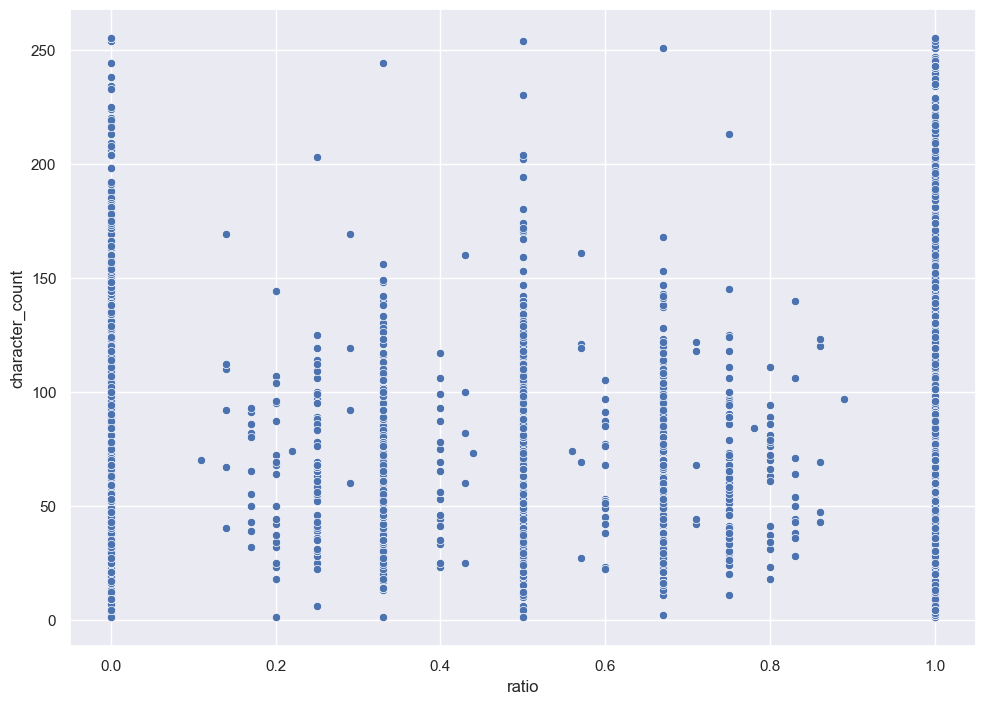

In [54]:
sns.scatterplot(data=df, x="ratio", y="character_count")

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='ratio', ylabel='character_count'>

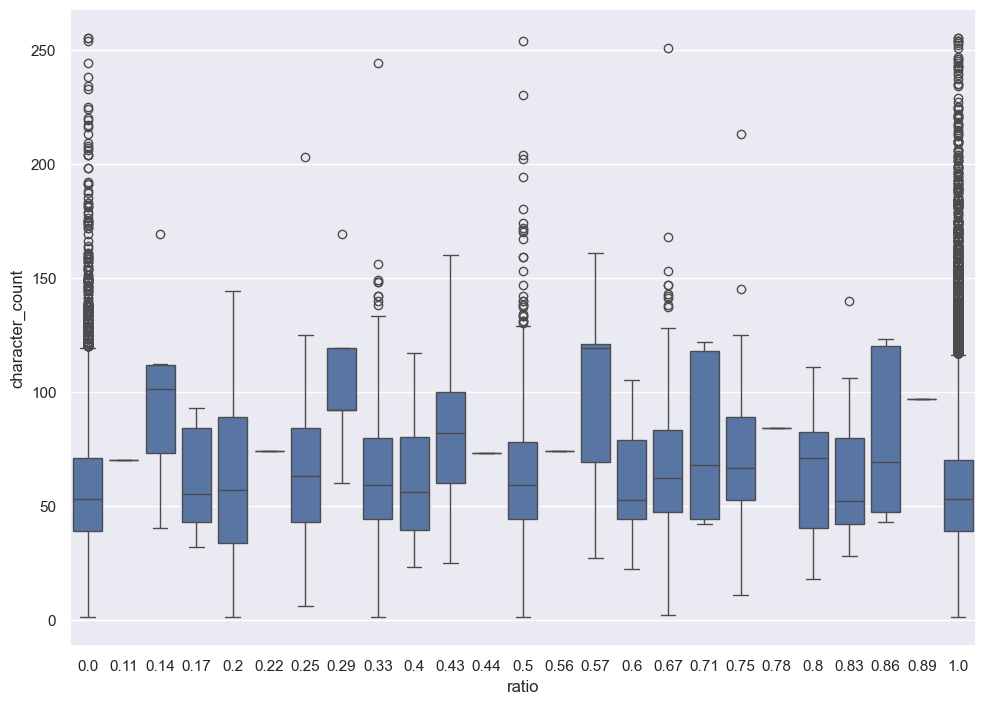

In [55]:
sns.boxplot(data=df, x="ratio", y="character_count")

In [56]:
max_ratio = df[df['ratio'] == 1]
max_ratio.describe()

,Unnamed: 0,issue_id,history_order,field_evo_order,character_count,ratio
count,6.286300e+04,6.286300e+04,62863.000000,62863.000000,62863.000000,62863.0
mean,8.034920e+05,2.534047e+06,0.669535,0.163785,56.675342,1.0
std,4.495875e+05,4.947722e+06,3.138644,0.481196,25.353960,0.0
min,0.000000e+00,1.000300e+04,0.000000,0.000000,1.000000,1.0
25%,4.236005e+05,3.135300e+04,0.000000,0.000000,39.000000,1.0
50%,8.028120e+05,6.976000e+04,0.000000,0.000000,53.000000,1.0
75%,1.188387e+06,6.054765e+05,0.000000,0.000000,70.000000,1.0
max,1.580874e+06,1.441754e+07,259.000000,9.000000,255.000000,1.0
